In [1]:
from braingeneers import analysis
import braingeneers.data.datasets_electrophysiology as ephys
import braingeneers.utils.smart_open_braingeneers as smart_open
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from braingeneers.analysis import plot
from braingeneers.analysis import single_unit
plt.style.use('default')

#### Load  spt recordings

In [2]:
import os
spt_folder_dir = "/home/kang/disk/Opto/20230402_ucsf/2023_04_02_hc328_spt/"
rec_path = np.sort([fn for fn in os.listdir(spt_folder_dir) if fn.endswith('.h5')])
print(len(rec_path), rec_path)
curation_path = np.sort([fn for fn in os.listdir(spt_folder_dir) if fn.endswith('.zip')])
print(len(curation_path ), curation_path)
num_spt = len(rec_path)

8 ['2023_04_02_hc328_0.raw.h5' '2023_04_02_hc328_1.raw.h5'
 '2023_04_02_hc328_2.raw.h5' '2023_04_02_hc328_3.raw.h5'
 '2023_04_02_hc328_4.raw.h5' '2023_04_02_hc328_5.raw.h5'
 '2023_04_02_hc328_6.raw.h5' '2023_04_02_hc328_7.raw.h5']
16 ['2023_04_02_hc328_0_curated.zip' '2023_04_02_hc328_0_phy.zip'
 '2023_04_02_hc328_1_curated.zip' '2023_04_02_hc328_1_phy.zip'
 '2023_04_02_hc328_2_curated.zip' '2023_04_02_hc328_2_phy.zip'
 '2023_04_02_hc328_3_curated.zip' '2023_04_02_hc328_3_phy.zip'
 '2023_04_02_hc328_4_curated.zip' '2023_04_02_hc328_4_phy.zip'
 '2023_04_02_hc328_5_curated.zip' '2023_04_02_hc328_5_phy.zip'
 '2023_04_02_hc328_6_curated.zip' '2023_04_02_hc328_6_phy.zip'
 '2023_04_02_hc328_7_curated.zip' '2023_04_02_hc328_7_phy.zip']


In [3]:
spt_spike_data = [analysis.read_phy_files(spt_folder_dir + curation_path[i]) 
                  for i in range(1, 6)]
spt_stim_pairs = [ephys.load_gpio_maxwell(spt_folder_dir + rec_path[i])[0]
                                      for i in range(1, 6)] 

In [4]:
print(spt_stim_pairs)
print(np.diff(spt_stim_pairs))

[array([10.0188, 20.0188]), array([10.0173 , 20.01725]), array([10.0226 , 20.02255]), array([10.02515, 20.0251 ]), array([10.03595, 20.0359 ])]
[[10.     ]
 [ 9.99995]
 [ 9.99995]
 [ 9.99995]
 [ 9.99995]]


In [5]:
import pickle
with open("spontanous_spike_data.pkl", "wb") as file:
    pickle.dump(spt_spike_data, file)
with open("spontanous_stim.pkl", "wb") as file:
    pickle.dump(spt_stim_pairs, file)

#### Load bicucu data

In [6]:
folder_dir = "/home/kang/disk/Opto/20230402_ucsf/"
rec_hckcr_3_path = folder_dir + "2023_04_04_hc328_hckcr1-2_3.raw.h5"
rec_hckcr_3_curation_path = folder_dir + "2023_04_04_hc328_hckcr1-2_3_phy/2023_04_04_hc328_hckcr1-2_3_curated.zip"
file_name = "2023_04_04_hc328_hckcr1-2_3.raw.h5"

In [8]:
spike_data_hckcr_3 = analysis.read_phy_files(rec_hckcr_3_curation_path)
stim_pairs_bi = ephys.load_gpio_maxwell(rec_hckcr_3_path)

## Take the first 5 stim pairs, no repeat section
num_trial = 5
offset = 2
stim_trial = stim_pairs_bi[offset:num_trial*4+offset].reshape(num_trial, 4)[:, :2]
print(stim_trial)

Odd number of GPIO events can't be paired. Here returns all the events.
[[ 40.02905  50.029  ]
 [ 80.0535   90.05345]
 [120.07845 130.0784 ]
 [160.0998  170.0998 ]
 [200.13275 210.13275]]


In [89]:
# ## load 0510 experiment
# rec_2_path = "/home/kang/disk/Opto/20230510_ucsf/hc52_chip18790_rec51023_2.raw.h5"
# rec_2_curation_path = "/home/kang/disk/Opto/20230510_ucsf/hc52_chip18790_rec51023_2_curated.zip"
# spike_data_2 = analysis.read_phy_files(rec_2_curation_path)
# stim_pairs_2 = ephys.load_gpio_maxwell(rec_2_path)
# print(stim_pairs_2)

In [9]:
# combine these two replicates
# trial 0: 0404 stim_trial[0]
# trial 1: 0404 stim_trial[2]
# trial 2: 0404 stim_trial[4]
# trial 3: 0510 stim_pairs_2[0]
# trial 4: 0510 stim_pairs_2[1]
# bicucu_stim_pairs = np.asarray([stim_trial[0], stim_trial[2], stim_trial[4], 
#                              stim_pairs_2[0], stim_pairs_2[1]])
# bicucu_spike_data = [spike_data_hckcr_3, spike_data_hckcr_3, spike_data_hckcr_3,
#                   spike_data_2, spike_data_2]


bicucu_stim_pairs = stim_trial
bicucu_spike_data = [spike_data_hckcr_3, spike_data_hckcr_3, spike_data_hckcr_3,
                  spike_data_hckcr_3, spike_data_hckcr_3]
with open("bicucu_spike_data.pkl", "wb") as file:
    pickle.dump(bicucu_spike_data, file)
with open("bicucu_stim.pkl", "wb") as file:
    pickle.dump(stim_trial, file)


Plot figures

In [10]:
num_trial = 5
section = ["pre", "stim", "post"]

In [11]:
### amplitudes for subtime, all 5 trials together
# add mean amplitdue for each section
def create_trial_dict(stim_pairs_all, spike_data_all, duration = 10*1000.0):
    num_trials = len(spike_data_all)
    amp_trial = {n:{"pre": [], "stim": [], "post": []} for n in range(num_trials)}
    mean_amp_trial = {n:{"pre": [], "stim": [], "post": []} for n in range(num_trials)}
    st_trial = {n:{"pre": [], "stim": [], "post": []} for n in range(num_trials)}
    fr_trial = {n:{"pre": [], "stim": [], "post": []} for n in range(num_trials)}
    for i in range(num_trials):
        spike_data = spike_data_all[i]
        neuron_dict  = spike_data.neuron_data[0]
        stim = stim_pairs_all[i]  * 1000.0
        print(stim)
        for k in neuron_dict.keys():
            amplitudes = np.array(neuron_dict[k]["amplitudes"])

            pre_start, pre_end = stim[0]-duration, stim[0]
            amp_pre = amplitudes[(spike_data.train[k] > pre_start) & (spike_data.train[k] <= pre_end)]
            st_pre = spike_data.train[k][(spike_data.train[k] > pre_start) & (spike_data.train[k] <= pre_end)]
            amp_trial[i]["pre"].append(amp_pre)
            if len(amp_pre) > 0:
                mean_amp_trial[i]["pre"] = np.append(mean_amp_trial[i]["pre"], np.mean(amp_pre))  
            else: 
                mean_amp_trial[i]["pre"] = np.append(mean_amp_trial[i]["pre"], np.nan)
            st_trial[i]["pre"].append(st_pre)
            fr_trial[i]["pre"].append(len(st_pre)/10)

            stim_start, stim_end = stim[0], stim[0]+duration
            amp_stim = amplitudes[(spike_data.train[k] > stim_start) & (spike_data.train[k] <= stim_end)]
            st_stim = spike_data.train[k][(spike_data.train[k] > stim_start) & (spike_data.train[k] <= stim_end)]
            amp_trial[i]["stim"].append(amp_stim)
            if len(amp_stim) > 0:
                mean_amp_trial[i]["stim"] = np.append(mean_amp_trial[i]["stim"], np.mean(amp_stim)) 
            else:
                mean_amp_trial[i]["stim"] = np.append(mean_amp_trial[i]["stim"], np.nan)
            st_trial[i]["stim"].append(st_stim)
            fr_trial[i]["stim"].append(len(st_stim)/10)

            post_start, post_end = stim[0]+duration, stim[0]+2*duration
            amp_post = amplitudes[(spike_data.train[k] > post_start) & (spike_data.train[k] <= post_end)]
            st_post = spike_data.train[k][(spike_data.train[k] > post_start) & (spike_data.train[k] <= post_end)]
            amp_trial[i]["post"].append(amp_post)
            if len(amp_post) > 0: 
                mean_amp_trial[i]["post"] = np.append(mean_amp_trial[i]["post"], np.mean(amp_post))  
            else:
                mean_amp_trial[i]["post"] = np.append(mean_amp_trial[i]["post"], np.nan)
            st_trial[i]["post"].append(st_post)
            fr_trial[i]["post"].append(len(st_post)/10)

            # st_trial[i]["pre"].append(spike_data.train[k][ind_pre[0]: ind_pre[1]])
            # st_trial[i]["stim"].append(spike_data.train[k][ind_stim[0]: ind_stim[1]])
            # st_trial[i]["post"].append(spike_data.train[k][ind_post[0]: ind_post[1]])
            
    return st_trial, fr_trial, amp_trial, mean_amp_trial


In [12]:
spt_st_trial, spt_fr_trial, spt_amp_trial, spt_mean_amp_trial = create_trial_dict(spt_stim_pairs, spt_spike_data)

[10018.8 20018.8]
[10017.3  20017.25]
[10022.6  20022.55]
[10025.15 20025.1 ]
[10035.95 20035.9 ]


In [112]:
# def get_fr_trial(st_trial, num_trial=5):
#     fr_trial = {n:{"pre":[], "light-on":[], "light-off":[]} for n in range(num_trial)}
#     for i in range(num_trial):
#         curr_st = st_trial[i]
#         for n in range(len(curr_st["pre"])):
#             fr_trial[i]["pre"].append(len(curr_st['pre'][n]) / 10)
#             fr_trial[i]["light-on"].append(len(curr_st['stim'][n]) / 10)
#             fr_trial[i]["light-off"].append(len(curr_st['post'][n]) / 10)
#     return fr_trial

In [113]:
# print(np.mean(spt_fr_trial["pre"]),
# np.mean(spt_fr_trial["stim"]),
# np.mean(spt_fr_trial["post"]))

In [13]:
bicucu_st_trial, bicucu_fr_trial, bicucu_amp_trial, bicucu_mean_amp_trial = create_trial_dict(bicucu_stim_pairs, bicucu_spike_data)
for k in range(num_trial):
    print(k)
    print(len(bicucu_st_trial[k]["pre"]))
    print(len(bicucu_amp_trial[k]["pre"]))
    print(len(bicucu_mean_amp_trial[k]["pre"]))

[40029.05 50029.  ]
[80053.5  90053.45]
[120078.45 130078.4 ]
[160099.8 170099.8]
[200132.75 210132.75]
0
65
65
65
1
65
65
65
2
65
65
65
3
65
65
65
4
65
65
65


In [14]:
with open("spt_st_by_trial.pkl", "wb") as file:
    pickle.dump(spt_st_trial, file)
with open("spt_fr_by_trial.pkl", "wb") as file:
    pickle.dump(spt_fr_trial, file)
with open("spt_amp_by_trial.pkl", "wb") as file:
    pickle.dump(spt_amp_trial, file)
with open("spt_mean_amp_by_trial.pkl", "wb") as file:
    pickle.dump(spt_mean_amp_trial, file)
with open("bicucu_st_by_trial.pkl", "wb") as file:
    pickle.dump(bicucu_st_trial, file)
with open("bicucu_fr_by_trial.pkl", "wb") as file:
    pickle.dump(bicucu_fr_trial, file)
with open("bicucu_amp_by_trial.pkl", "wb") as file:
    pickle.dump(bicucu_amp_trial, file)
with open("bicucu_mean_amp_by_trial.pkl", "wb") as file:
    pickle.dump(bicucu_mean_amp_trial, file)

In [116]:
# spt_fr_trial = get_fr_trial(spt_st_trial)
# bicucu_fr_trial = get_fr_trial(bicucu_st_trial)

In [118]:
import csv
import pandas as pd
# csv_columns = ["pre", "stim", "post"]
for i in range(num_trial):
    spt_amp = pd.DataFrame.from_dict(spt_mean_amp_trial[i])
    spt_fr = pd.DataFrame.from_dict(spt_fr_trial[i])
    bicucu_amp = pd.DataFrame.from_dict(bicucu_mean_amp_trial[i])
    bicucu_fr = pd.DataFrame.from_dict(bicucu_fr_trial[i])

    # spt_amp = spt_amp.rename(columns={'pre': 'pre', 'stim': 'light-on', 'post': 'light-off'})
    # bicucu_amp = bicucu_amp.rename(columns={'pre': 'pre', 'stim': 'light-on', 'post': 'light-off'})

    spt_amp_csv = "hc328_0402_amp_trial_"+str(i+1)+".csv"
    spt_fr_csv = "hc328_0402_fr_trial_"+str(i+1)+".csv"
    bicucu_amp_csv = "hc328_0404_amp_trial_"+str(i+1)+".csv"
    bicucu_fr_csv = "hc328_0404_fr_trial_"+str(i+1)+".csv"

    spt_amp.to_csv(spt_amp_csv, index=False)
    spt_fr.to_csv(spt_fr_csv, index=False)
    bicucu_amp.to_csv(bicucu_amp_csv, index=False)
    bicucu_fr.to_csv(bicucu_fr_csv, index=False)

In [109]:
### stack all amplitudes for bar plot
def stack_amplitudes(amp_trial, num_trial=5):
    amp_sec = {"pre": [], "stim":[], "post":[]}
    for i in range(num_trial):
        amp_sec["pre"] += list(np.hstack(amp_trial[i]["pre"]))
        amp_sec["stim"] += list(np.hstack(amp_trial[i]["stim"]))
        amp_sec["post"] += list(np.hstack(amp_trial[i]["post"]))
    return amp_sec

In [48]:
spt_amp_sec = stack_amplitudes(spt_amp_trial)
bicucu_amp_sec = stack_amplitudes(bicucu_amp_trial)
spt_mean_amp_sec = stack_amplitudes(spt_mean_amp_trial)
bicucu_mean_amp_sec = stack_amplitudes(bicucu_mean_amp_trial)

In [49]:
print(len(spt_amp_sec))
print(len(spt_amp_sec["pre"]))
print(len(spt_mean_amp_sec["pre"]))


3
5297
290


In [68]:
def plot_amp_bar(amp_sec, sections, title):
        from matplotlib.patches import Patch
        mean = [np.mean(amp_sec[k]) for k in amp_sec.keys()]
        sem = [np.std(amp_sec[k], ddof=1) for k in amp_sec.keys()]
        fig, axs = plt.subplots(figsize = (5, 4), constrained_layout=True)
        plt.title(title, fontsize=12)
        edge_colors = ["red", "blue", "g"]
        fill_colors = ["tan", "cyan", "green"]
        axs.bar(np.arange(len(sections)), mean, yerr=sem, 
                width=0.7, align='center', color=edge_colors, capsize=10)
        patches = [Patch(color=v, label=k) for k, v in dict(zip(sections, edge_colors)).items()]

        # axs.legend(labels=sections, handles=patches, loc="upper right", fontsize=12)
        axs.set_xticks(np.arange(len(sections)), sections)
        axs.set_ylabel("Amplitude (uV)", fontsize=16)
        axs.set_xlim(-0.5, 3)
        axs.set_ylim(0, 50)
        axs.xaxis.set_tick_params(labelsize=16)
        axs.yaxis.set_tick_params(labelsize=16)
        plt.savefig("{}.svg".format(title), dpi=300)
        plt.savefig("{}.png".format(title), transparent=True, dpi=300)

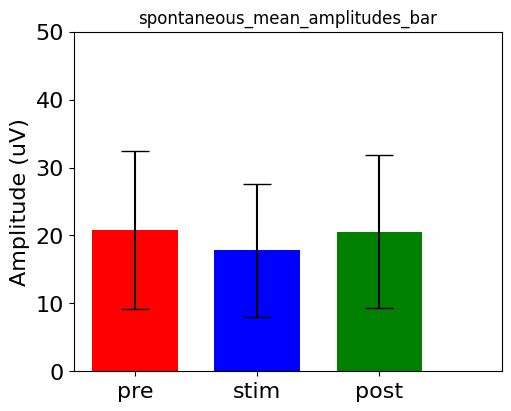

In [69]:
# plot_amp_bar(amp_sec=spt_amp_sec, sections=section, title="spontaneous_amplitudes_bar")
plot_amp_bar(amp_sec=spt_mean_amp_sec, sections=section, title="spontaneous_mean_amplitudes_bar")

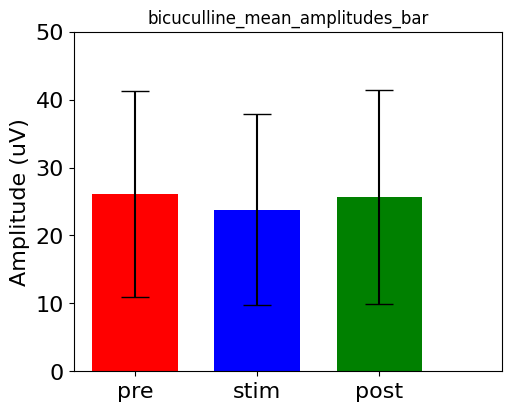

In [70]:
# plot_amp_bar(amp_sec=bicucu_amp_sec, sections=section, title="bicuculline_amplitudes_bar")
plot_amp_bar(amp_sec=bicucu_mean_amp_sec, sections=section, title="bicuculline_mean_amplitudes_bar")

In [74]:
def plot_amp_box(amp_sec, sections, title, dotted=False):
    fig, axs = plt.subplots(figsize = (5, 4), constrained_layout=True)
    plt.title("amplitude_" + title, fontsize=12)
    edge_colors = ["red", "blue", "green"]
    fill_colors = ["tan", "cyan", "seagreen"]
    for j in range(len(amp_sec)):
        k = list(amp_sec.keys())[j]
        # print(j, k, reversed_trial[k])
        bpl = axs.boxplot(amp_sec[k], positions=[j], sym="", widths=0.3, 
                        whiskerprops=dict(linestyle='--',linewidth=2),
                        boxprops= dict(linewidth=2.0))
        for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
            plt.setp(bpl[element], color=edge_colors[j])
    
    if dotted:
        data = list(amp_sec.values())
        lines = []
        for i, d in enumerate(data):
            y = d
            print(i, len(y))
            x = np.random.normal(i, 0.04, len(y))
            plt.scatter(x, y, s=3, color=fill_colors[i], alpha=0.4)

    axs.set_xticks(np.arange(len(sections)), sections)
    axs.set_ylabel("Amplitude (uV)", fontsize=16)
    axs.set_xlim(-0.5, 3)
    axs.set_ylim(0, 100)
    axs.xaxis.set_tick_params(labelsize=16)
    axs.yaxis.set_tick_params(labelsize=16)
    axs.spines[['right', 'top']].set_visible(False)
    plt.savefig("amplitude_{}_dotted.svg".format(title), dpi=300)
    plt.savefig("amplitude_{}_dotted.png".format(title), transparent=True, dpi=300)

0 5297
1 1482
2 2980


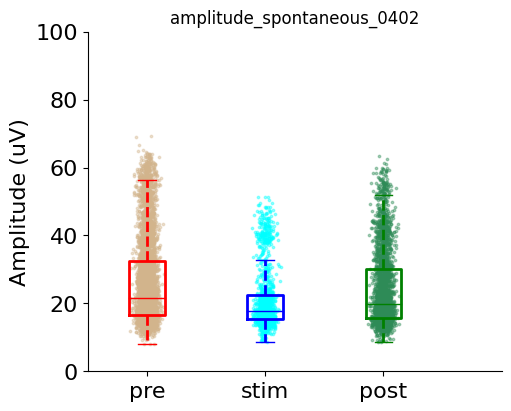

In [75]:
plot_amp_box(amp_sec=spt_amp_sec, sections=section, title="spontaneous_0402", dotted=True)
# plot_amp_box(amp_sec=spt_mean_amp_sec, sections=section, title="spontaneous_0402", dotted=True)

0 20137
1 3201
2 20841


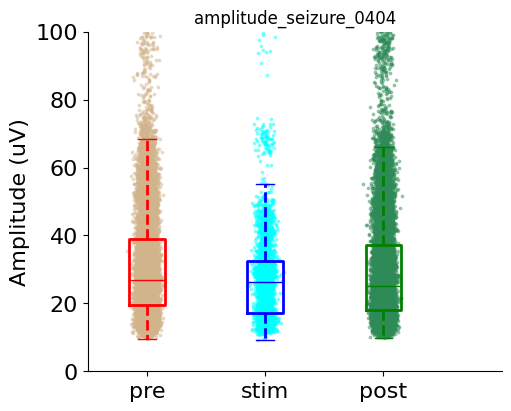

In [76]:
plot_amp_box(amp_sec=bicucu_amp_sec, sections=section, title="seizure_0404", dotted=True)
# plot_amp_box(amp_sec=bicucu_mean_amp_sec, sections=section, title="seizure_0404", dotted=True)